# Vector Representations Warmup
## *Data Science Unit 4 Sprint 1 Module 2*

## Objective 1 - Represent a Document as Vector (Text Vectorization)

Represent text from a document as a vector of numbers instead of tokens.

In [1]:
# Create the corpus with random sentences

corpus = ["Karma, karma, karma, karma, karma chameleon.",
          "The paintbrush was angry at the color the chameleon chose to use.",
          "She stomped on her fruit loops and thus became a cereal killer.",
          "He hated that he loved what she hated about cereal and her chameleon."
         ]

### Frequency-count

Binary Bit Vector
- A word is recorded as present (1) or missing (0)

In [2]:
# Frequency-count

# Import the feature_extraction module and vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the object and count the words
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

# Convert to dense vectors (leave out the zeroes)
print(vectors.todense())

[[0 0 0 0 0 0 1 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 1 1 1 0]
 [0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0]
 [1 1 0 0 0 1 1 0 0 0 2 2 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


### One-hot Encoding

Bag-of-Words
- Records multiplicity/count (disregards grammar and order of words)
- Each cell is the term frequency

In [4]:
# One-hot encoding of word counts

# Import the binary encoder
from sklearn.preprocessing import Binarizer

# Initialize the vectorizer and get the word counts
freq   = CountVectorizer()
corpus_freq = freq.fit_transform(corpus)

# Initialize the binarizer and create the binary encoded vector
onehot = Binarizer()
corpus_onehot = onehot.fit_transform(corpus_freq.toarray())

# Display the one-hot encoded vector
corpus_onehot

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1]], dtype=int64)

### Term frequency-inverse document frequency

Document-Term Matrix (DTM)
- Describes frequency of terms in a collection of documents
- rows = documents, columns = terms
- tf-idf = # of occurrences in document / # of documents in which word occurs

In [6]:
# Import libraries and modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(corpus)

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View feature matrix as DataFrame
dtm.head()

,angry,cereal,chameleon,chose,color,fruit,hated,karma,killer,loops,loved,paintbrush,stomped,use
0,0.000000,0.000000,0.126630,0.000000,0.000000,0.000000,0.00000,0.99195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.430037,0.000000,0.274487,0.430037,0.430037,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.430037,0.000000,0.430037
2,0.000000,0.366739,0.000000,0.000000,0.000000,0.465162,0.00000,0.00000,0.465162,0.465162,0.000000,0.000000,0.465162,0.000000
3,0.000000,0.321093,0.259952,0.000000,0.000000,0.000000,0.81453,0.00000,0.000000,0.000000,0.407265,0.000000,0.000000,0.000000


## Objective 2 - Query Documents by Similarity

### Vector Spaces
- A vector space is defined by the number of dimensions in the space (i.e. the number of elements in an array).
- In text vectors, this is the number of distinct words in the corpus.

### Cosine Similarity
- Two vectors are similar when they have the same length and direction
- Length is the number of unique words in the corpus
- To determine similarity between two vectors, calculate the cosine similarity - the smaller the angle between them, the more similar they are
- Think of this as the normalized dot product where the dot product of the vectors A and B is divided by their lengths

### Follow along

In [10]:
# Create the corpus (text is available in a github repo)

# Import module, open and read file
from urllib.request import urlopen

# The text consists of three documents on three different subjects
link = 'https://raw.githubusercontent.com/nwhoffman/NLP_example_text/master/u4s1m2_similarity.txt'
f = urlopen(link)
myfile = f.read()

mystring = str(myfile, 'utf-8')
corpus = mystring.split(';')

# Print out the first 300 characters for each document
for i in [0, 1, 2]:
    print('Document:', i)
    print(corpus[i][0:300])

Document: 0
The gravitational forces exerted by the Moon at several points on Earth are illustrated in Figure 4.16. These forces differ slightly from one another because Earth is not a point, but has a certain size: all parts are not equally distant from the Moon, nor are they all in exactly the same direction 
Document: 1
 A cell is the smallest unit of a living thing. Whether comprised of one cell (like bacteria) or many cells (like a human), we call it an organism. Thus, cells are the basic building blocks of all organisms. Several cells of one kind that interconnect with each other and perform a shared function fo
Document: 2
 What do aching feet, a falling apple, and the orbit of the Moon have in common? Each is caused by the gravitational force. Our feet are strained by supporting our weight—the force of Earth’s gravity on us. An apple falls from a tree because of the same force acting a few meters above Earth’s surfac


In [11]:
# Create the vectors for each document
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get tfidf values per document
dtm = tfidf.fit_transform(corpus)

In [12]:
# Imports
import pandas as pd

# Get feature names to use as DataFrame column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View the feature matrix as a DataFrame
dtm.head()

,16,able,aching,acting,acts,animal,apple,attracted,attraction,bacteria,...,types,underlying,understood,unit,universe,valid,vary,ways,weakest,weight
0,0.082019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164038,0.082019,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.071219,0.000000,0.000000,0.000000,0.071219,...,0.071219,0.000000,0.000000,0.071219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.088592,0.088592,0.088592,0.088592,0.000000,0.177185,0.000000,0.000000,0.000000,...,0.000000,0.088592,0.088592,0.000000,0.088592,0.088592,0.088592,0.088592,0.088592,0.088592


In [13]:
# Find the cosine similarity of tf-idf vectors
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim  = cosine_similarity(dtm)

# Turn it into a DataFrame
cosine_sim = pd.DataFrame(cosine_sim)
display(cosine_sim)

,0,1,2
0,1.000000,0.000000,0.197532
1,0.000000,1.000000,0.007299
2,0.197532,0.007299,1.000000


## Objective 3 - Apply Word Embedding Models to Create Document Vectors

### Word Embedding
- A word is represented as a continuous vector in a space with a much lower dimension
- All unique words are mapped to vectors in real space
- Each word is mapped to a single vector that is learned from applying neural network techniques
- Words used in the same contexts will have similar means and similar word vectors

### Word2vec
- A word vector can be thought of as a list of weights or scores, where each element is a specific dimension
- Each dimension can be thought of as things like "peopleness" or "animalness" or "foodness" where the combination of all of these "ness" values is the word vector


### Algorithms used by Word2vec to create word vectors

skip-gram
- Predicts surrounding words based on the input word
- Makes use of n-grams that contain gaps where the token in between is skipped
- Works well with small corpora and rare words

CBOW (continuous-bag-of-words)
- Predicts the center word from the surrounding words
- Works similar to the skip-gram method
- Faster to train
- Higher accuracy for words that are used frequently

### Follow along

In [17]:
# Import the library and model
import spacy
nlp = spacy.load('en_core_web_lg')

# Set the document (this example contains two words)
doc = nlp("drama llama")

# Get the vectors for document
# (the vectors are the average of the two word vectors)
llama_vector = doc.vector

# Look length of the vector (how many dimensions?)
print(llama_vector.shape)

# Display part of the vector
print(llama_vector[:10])

(300,)
[-0.04911    -0.23685     0.10623751 -0.19662951 -0.403395    0.238247
  0.1852     -0.28211    -0.31013     1.0560249 ]


In [18]:
# Find the similarity score for example words

# Compare "llama" and "horse"
print("The similarity score for llama-llama is: ", nlp("llama").similarity(nlp("llama")))
print("The similarity score for llama-horse is: ", nlp("llama").similarity(nlp("horse")))
print("The similarity score for llama-car is: ", nlp("llama").similarity(nlp("car")))

The similarity score for llama-llama is:  1.0
The similarity score for llama-horse is:  0.37856930047799736
The similarity score for llama-car is:  0.08994985333860218


In [19]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

# Define a function to find the vector for a word
def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

# Example word list to find vectors for
words = ['python', 'javascript', 'code', 'data', 'linux',
        'llama', 'alpaca', 'cat', 'snake',
        'cook', 'bake', 'cookie', 'clean', 'car']

# Initialize the PCA model and project down to two dimensions
pca = PCA(n_components=2)

# Fit the PCA model on the word list
pca.fit(get_word_vectors(words))

# Apply the transformation learned from the PCA model
word_vecs_2d = pca.transform(get_word_vectors(words))

# Look at the 2-D array (which is just x and y coordinates)
word_vecs_2d

array([[ 2.87538871,  2.1924341 ],
       [ 3.89682021, -0.73923489],
       [ 3.69059896, -1.41344964],
       [ 2.95501969, -1.67204314],
       [ 3.21524274, -0.10002494],
       [-1.79493447,  4.34816682],
       [-2.3407361 ,  4.28495142],
       [-1.45716462,  1.55856908],
       [-0.84419009,  2.45805994],
       [-3.56703596, -2.77326173],
       [-3.87441702, -3.66247474],
       [-1.3833254 , -2.81328086],
       [-0.81738513, -1.28377165],
       [-0.55388151, -0.38463977]])

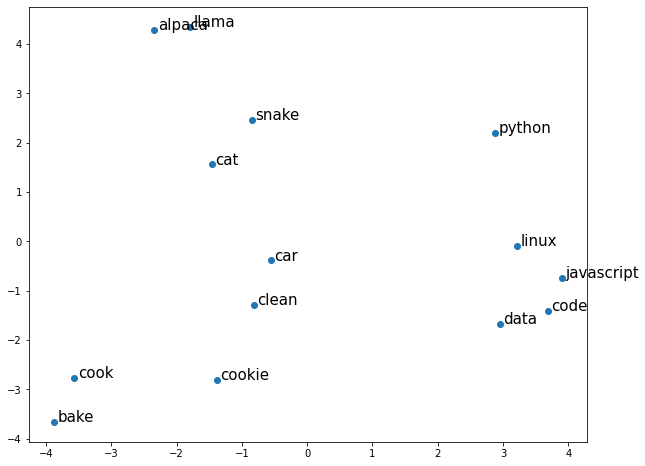

In [20]:
# Imports for plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# Display the text of the word at each point
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x+0.05, y, word, size= 15)

# show the plot
plt.show()